In [1]:
import pandas as pd

In [2]:
download_url = (
   ...:     "https://raw.githubusercontent.com/fivethirtyeight/"
   ...:     "data/master/college-majors/recent-grads.csv"
   ...: )


In [3]:
df = pd.read_csv(download_url)

In [4]:
type(df)

pandas.core.frame.DataFrame

In [6]:
pd.set_option("display.max.columns", None)

In [7]:
df.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,1849,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,556,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,558,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,1069,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,23170,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [ ]:
Create Your First Pandas Plot
Your dataset contains some columns related to the earnings of graduates in each major:

"Median" is the median earnings of full-time, year-round workers.
"P25th" is the 25th percentile of earnings.
"P75th" is the 75th percentile of earnings.
"Rank" is the major’s rank by median earnings.

In [8]:
%matplotlib 

Using matplotlib backend: <object object at 0x000002B57F635B60>


In [11]:
%matplotlib inline

<Axes: xlabel='Rank'>

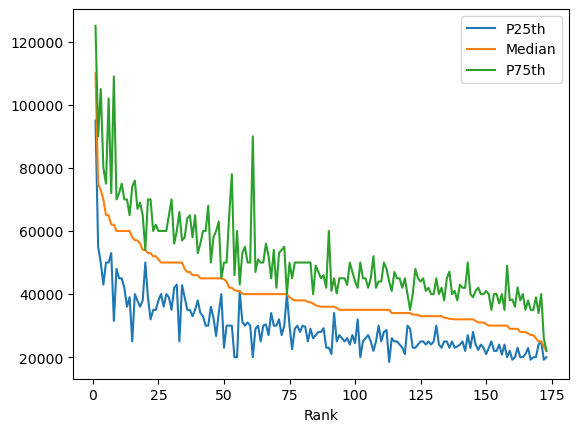

In [12]:
df.plot(x="Rank", y=["P25th", "Median", "P75th"])

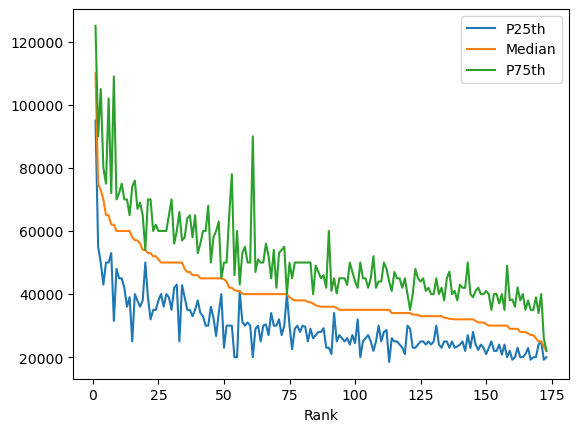

In [13]:
import matplotlib.pyplot as plt
df.plot(x="Rank", y=["P25th", "Median", "P75th"]) 
plt.show()

In [ ]:
.plot() has several optional parameters. Most notably, the kind parameter accepts 
eleven different string values and determines which kind of plot you’ll create:

"area" is for area plots.
"bar" is for vertical bar charts.
"barh" is for horizontal bar charts.
"box" is for box plots.
"hexbin" is for hexbin plots.
"hist" is for histograms.
"kde" is for kernel density estimate charts.
"density" is an alias for "kde".
"line" is for line graphs.
"pie" is for pie charts.
"scatter" is for scatter plots.

Note: As an alternative to passing strings to the kind parameter of .plot(), 
DataFrame objects have several methods that you can use to create the various kinds of plots described above:

.area()
.bar()
.barh()
.box()
.hexbin()
.hist()
.kde()
.density()
.line()
.pie()
.scatter()                     

In [15]:
import matplotlib.pyplot as plt

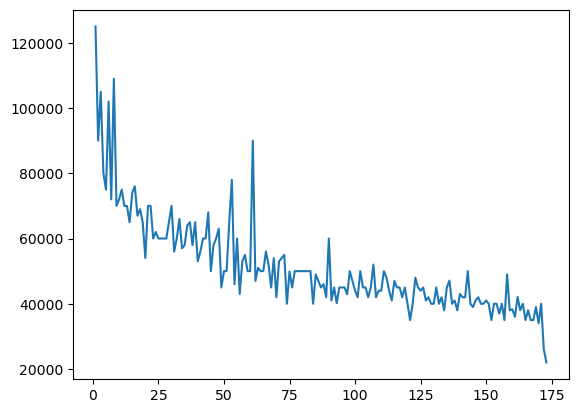

In [16]:
plt.plot(df["Rank"], df["P75th"])

<Axes: xlabel='Rank'>

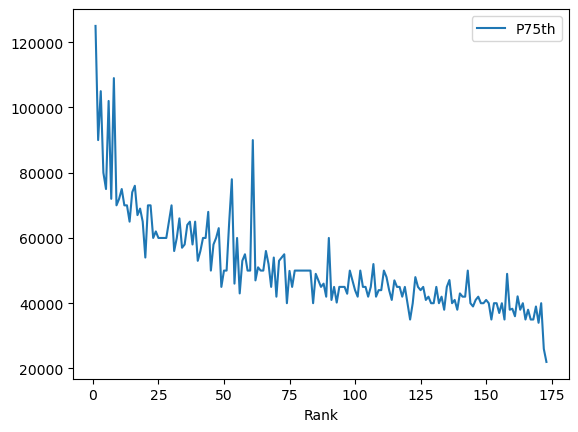

In [17]:
df.plot(x="Rank", y="P75th")

In [18]:
 median_column = df["Median"]
type(median_column)

pandas.core.series.Series

<Axes: ylabel='Frequency'>

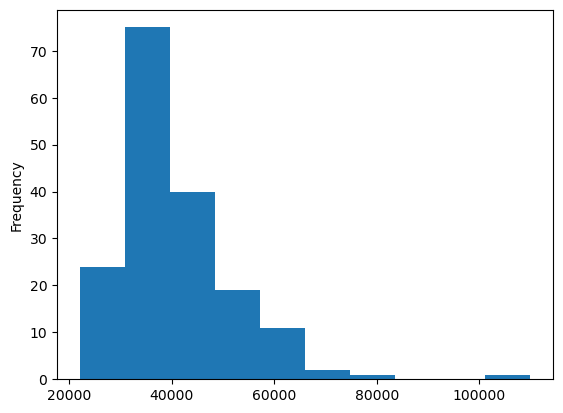

In [19]:
median_column.plot(kind="hist")

In [ ]:
1-To sort by the "Median" column, use .sort_values() and provide the name of the column you want to sort by as well as the direction ascending=False.
2-To get the top five items of your list, use .head().

In [21]:
top_5 = df.sort_values(by="Median", ascending=False).head()

<Axes: xlabel='Major'>

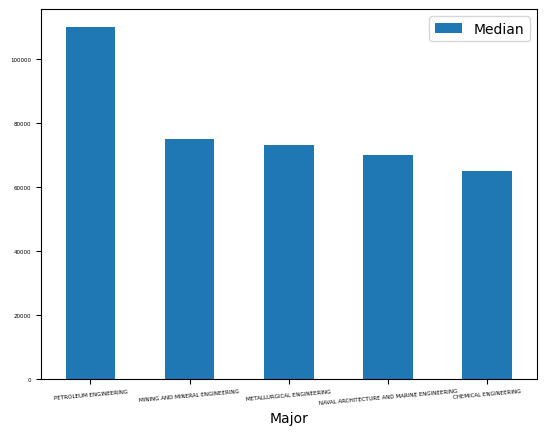

In [22]:
top_5.plot(x="Major", y="Median", kind="bar", rot=5, fontsize=4)

In [23]:
top_medians = df[df["Median"] > 60000].sort_values("Median")

In [ ]:
Let’s investigate all majors whose median salary is above $60,000. First, you need to filter these majors with the mask df[df["Median"] > 60000]. 
Then you can create another bar plot showing all three earnings columns:

<Axes: xlabel='Major'>

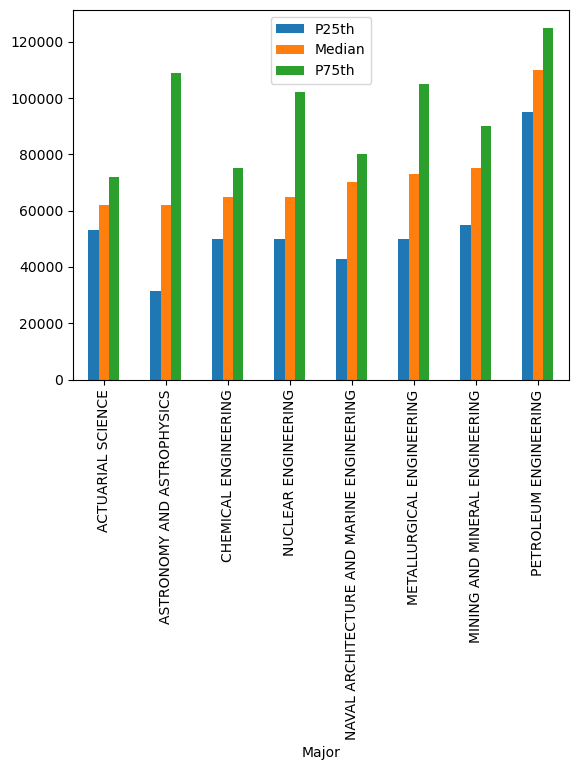

In [24]:
top_medians.plot(x="Major", y=["P25th", "Median", "P75th"], kind="bar")

In [ ]:
Check for Correlation
Often you want to see whether two columns of a dataset are connected. If you pick a major with higher median earnings, 
do you also have a lower chance of unemployment? As a first step, 
create a scatter plot with those two columns:

<Axes: xlabel='Median', ylabel='Unemployment_rate'>

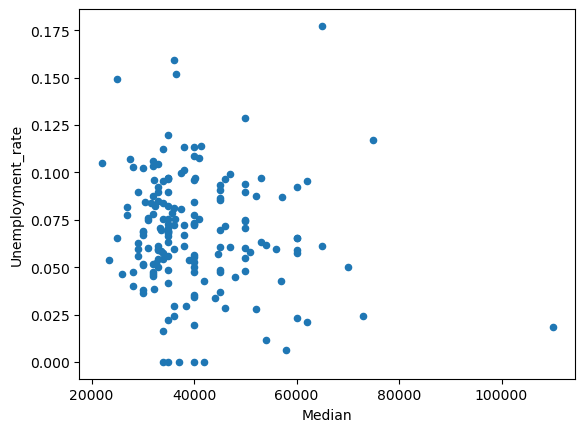

In [25]:
df.plot(x="Median", y="Unemployment_rate", kind="scatter")

In [ ]:
Analyze Categorical Data
To process bigger chunks of information, the human mind consciously and unconsciously sorts data into categories. 
This technique is often useful, but it’s far from flawless.

Sometimes we put things into a category that, upon further examination, aren’t all that similar. In this section, 
you’ll get to know some tools for examining categories and verifying whether a given categorization makes sense.

Many datasets already contain some explicit or implicit categorization. In the current example, the 173 majors are divided into 16 categories.

Grouping
A basic usage of categories is grouping and aggregation. You can use .groupby() to determine how popular each of the 
categories in the college major dataset are:



In [26]:
cat_totals = df.groupby("Major_category")["Total"].sum().sort_values()

In [27]:
cat_totals

Major_category
Interdisciplinary                        12296.0
Agriculture & Natural Resources          75620.0
Law & Public Policy                     179107.0
Physical Sciences                       185479.0
Industrial Arts & Consumer Services     229792.0
Computers & Mathematics                 299008.0
Arts                                    357130.0
Communications & Journalism             392601.0
Biology & Life Science                  453862.0
Health                                  463230.0
Psychology & Social Work                481007.0
Social Science                          529966.0
Engineering                             537583.0
Education                               559129.0
Humanities & Liberal Arts               713468.0
Business                               1302376.0
Name: Total, dtype: float64

In [ ]:
With .groupby(), you create a DataFrameGroupBy object. With .sum(), you create a Series.

Let’s draw a horizontal bar plot showing all the category totals in cat_totals:

<Axes: ylabel='Major_category'>

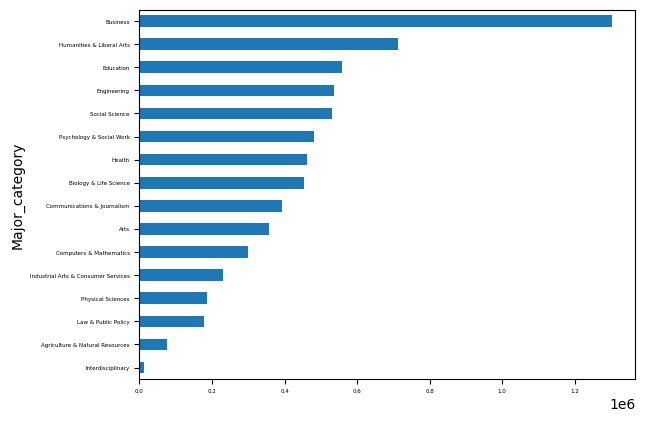

In [28]:
cat_totals.plot(kind="barh", fontsize=4)

In [ ]:
Determining Ratios
Vertical and horizontal bar charts are often a good choice if you want to see the difference between your categories. 
If you’re interested in ratios, then pie plots are an excellent tool. However, since cat_totals contains a few smaller categories, 
creating a pie plot with cat_totals.plot(kind="pie") will produce several tiny slices with overlapping labels .

To address this problem, you can lump the smaller categories into a single group. Merge all categories with a total under 100,000 
into a category called "Other", then create a pie plot:


In [29]:
small_cat_totals = cat_totals[cat_totals < 100_000]

In [30]:
big_cat_totals = cat_totals[cat_totals > 100_000]

In [ ]:
# Adding a new item "Other" with the sum of the small categories

In [35]:
small_sums = pd.Series([small_cat_totals.sum()], index=["Other"])

In [ ]:
big_cat_totals = big_cat_totals.append(small_sums)

<Axes: >

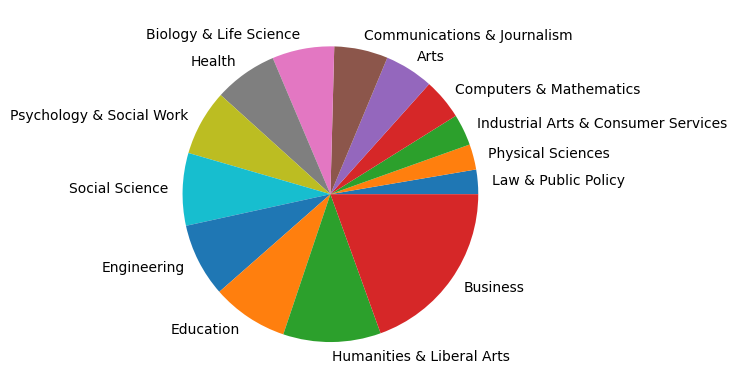

In [37]:
big_cat_totals.plot(kind="pie", label="")

In [ ]:
Zooming in on Categories
Sometimes you also want to verify whether a certain categorization makes sense. Are the members of a category more similar to 
one other than they are to the rest of the dataset? Again, a distribution is a good tool to get a first overview. Generally, 
we expect the distribution of a category to be similar to the normal distribution but have a smaller range.

Create a histogram plot showing the distribution of the median earnings for the engineering majors:

<Axes: ylabel='Frequency'>

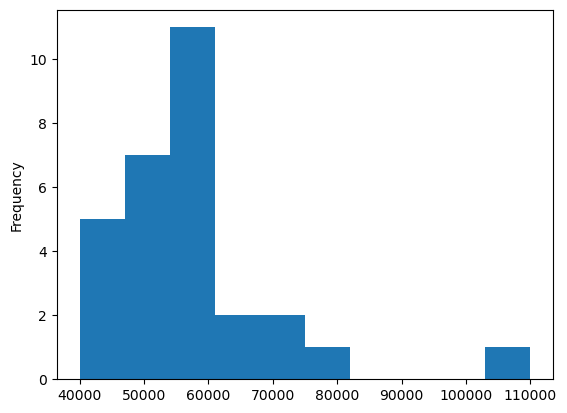

In [38]:
df[df["Major_category"] == "Engineering"]["Median"].plot(kind="hist")

In [ ]:
Conclusion
In this tutorial, you’ve learned how to start visualizing your dataset using Python and the pandas library. 
You’ve seen how some basic plots can give you insight into your data and guide your analysis.

In this tutorial, you learned how to:

Get an overview of your dataset’s distribution with a histogram
Discover correlation with a scatter plot
Analyze categories with bar plots and their ratios with pie plots
Determine which plot is most suited to your current task
Using .plot() and a small DataFrame, you’ve discovered quite a few possibilities for providing a picture of your data. 
You’re now ready to build on this knowledge and discover even more sophisticated visualizations.